In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data file
df = pd.read_csv("./Uber Request Data.csv")

In [2]:
# Look at df head
print(df.head())

   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47  


In [3]:
# inspect the structure and size of the data
print(df.info(), "\n")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None 

(6745, 6)


From the info and shape we know that that there are 6745 rows. And null values are present in Driver id and Drop timestamp. 

In [4]:
# look at unique Pickup point and status
print(df['Pickup point'].unique())
print(df['Status'].unique())

['Airport' 'City']
['Trip Completed' 'Cancelled' 'No Cars Available']


This confirms that there are 2 unique values for Pickup point which is 'Airport' and 'City. Similarly 3 unique values for 'Status'. So no data issues are there in these 2 columns

Now let us look at the missing values

In [5]:
# column-wise missing values 
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
#Find out the fraction of missing values
round(100*(df.isnull().sum()/len(df)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [7]:
#Let us find out the no. of unique Driver ids
print(len(df['Driver id'].unique()))

301


In [8]:
#check for the rows where Drop time is null or Driver id is null
df_drop_null=df.loc[pd.isnull(df["Drop timestamp"]) | (pd.isnull(df["Driver id"]))]
print (df_drop_null.head(10))

      Request id Pickup point  Driver id     Status    Request timestamp  \
2831        2905         City        1.0  Cancelled  13-07-2016 06:08:41   
2832        4805         City        1.0  Cancelled  14-07-2016 17:07:58   
2833        5202      Airport        1.0  Cancelled  14-07-2016 20:51:37   
2834        5927         City        1.0  Cancelled  15-07-2016 10:12:40   
2835        2347      Airport        2.0  Cancelled      12/7/2016 19:14   
2836        3806      Airport        2.0  Cancelled  13-07-2016 20:57:49   
2837        4451         City        2.0  Cancelled  14-07-2016 08:38:38   
2838        5023      Airport        2.0  Cancelled  14-07-2016 19:04:08   
2839          80         City        3.0  Cancelled       11/7/2016 4:47   
2840         534         City        3.0  Cancelled      11/7/2016 10:01   

     Drop timestamp  
2831            NaN  
2832            NaN  
2833            NaN  
2834            NaN  
2835            NaN  
2836            NaN  
2837     

In [9]:
print (df_drop_null.tail(10))

      Request id Pickup point  Driver id             Status  \
6735        6737      Airport        NaN  No Cars Available   
6736        6744      Airport        NaN  No Cars Available   
6737        6740         City        NaN  No Cars Available   
6738        6746         City        NaN  No Cars Available   
6739        6739         City        NaN  No Cars Available   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp Drop timestamp  
6735  15-07-2016 23:39:15            NaN  
6736  15-07-2016 23:42:51            NaN  
6737  15-07-2016 23:43:54            NaN  
6738  15-07-2016 23:46:03            NaN  
6739  15-07-2016 23:46:20            NaN  
6740  15-07-2016 23:49:03            NaN  
6741 

Drop timestamp is Nan for the rides which were cancelled or when No cars were Available and Driver id is Nan when no cars were available. This is infact quite logical and justified. So we need not drop these rows. Because if we drop these rows, a lot of our data will be deleted and we will not be able to analyse the cases when the cars are not available or when the trip was cancelled.
If we look at the timestamps, some dates are dd-mm-yyyy whereas some are dd/mm/yyyy. We need to convert them into DateTime format

In [10]:
#Convert the timestamps to proper DateTime format with dayfirst as True as the first value is day and also
#infer_datetime_format=True to allow the function to interpret the date format
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],infer_datetime_format=True, dayfirst=True)
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],infer_datetime_format=True, dayfirst=True)

In [11]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


Date Cleaning part is over. Now let us create plots to visualise the data better.

In [12]:
#To Seperate the weekend and weekday traffic, add a column 'Weekend' whose value is 1 if it is a Sat or Sun else 0
df['Weekend']=df['Request timestamp'].apply(lambda x : 1 if ((x.weekday==5) | (x.weekday==6)) else 0)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Weekend
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,0


In [13]:
df['Weekend'].sum()

0

All the requests are made on a weekday. So we can drop the column 'weekend'

In [14]:
df=df.drop(['Weekend'], axis=1)

Create 2 more Columns -
1. 'ReqHr' which extracts the hour from the Request Timestamp
2. TimeSlot - The day is divided into 6 timeslots and according to the Request Timestamp the TimeSlot is created

In [15]:
df["ReqHr"]= df['Request timestamp'].apply(lambda x : x.hour)
df["Timeslot"]=pd.cut(df.ReqHr,[0,4,8,12,16,20,24],labels=['Midnight', 'Early Morning','Morning','Afternoon','Evening','Night'], include_lowest=True)

In [16]:
#calculate trip time
df['TripTime']=df['Drop timestamp'] - df['Request timestamp']

In [17]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,ReqHr,Timeslot,TripTime
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening,00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,00:52:31
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,Night,00:31:31
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,Early Morning,00:57:43
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,Early Morning,00:56:00
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,Evening,00:53:24
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,Early Morning,00:39:00


Split the Dataframe into 2 Dfs according to the Pickup point. Whether it is City or Airport

In [18]:
df_city=df.loc[df['Pickup point'] == "City"]
df_airport=df.loc[df['Pickup point'] == "Airport"]

In [19]:
df_city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,ReqHr,Timeslot,TripTime
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,00:41:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,00:52:31
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,Evening,00:53:24
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,Early Morning,00:39:00
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12,Morning,00:27:00


In [20]:
df_airport.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,ReqHr,Timeslot,TripTime
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening,00:50:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,00:55:00
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,Night,00:31:31
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,Early Morning,00:57:43


Create a plot to show the count of various 'Status' on the basis of hours i.e the Count of 'Cancelled', 'No Cars available' and 'Trip Completed'

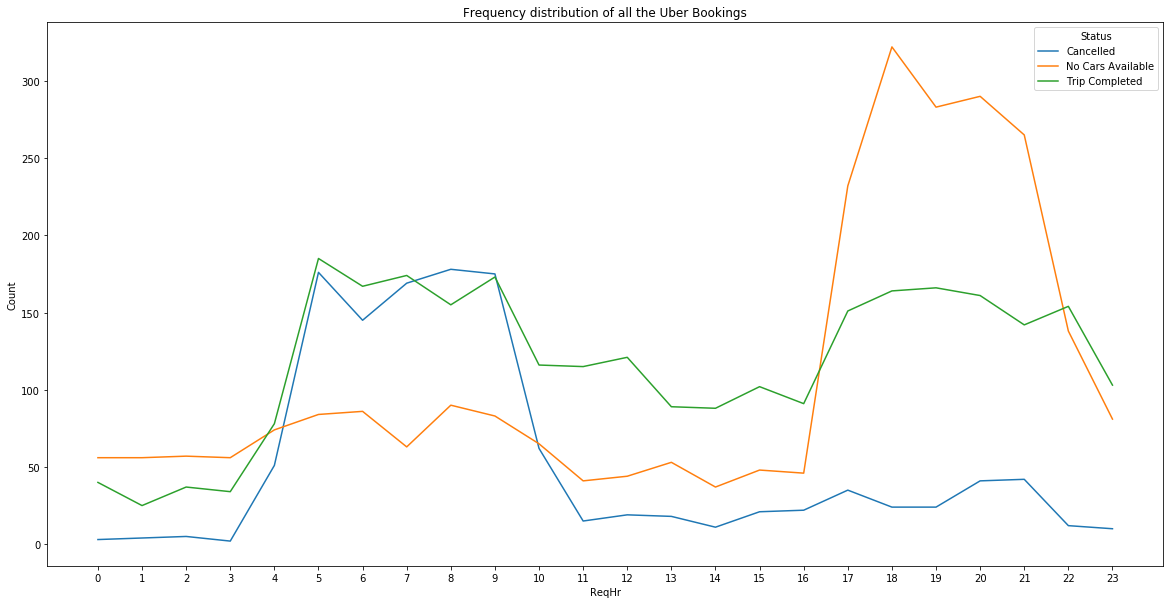

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel("Count")
plt.title("Frequency distribution of all the Uber Bookings")
df.groupby(['ReqHr','Status']).count()['Request id'].unstack().plot(ax=ax)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

Create two plots to show the Count of each status for 'city to Airport' and 'Airport to city' seperately for each hour. Also create another column 'Total' which stores the total requests.

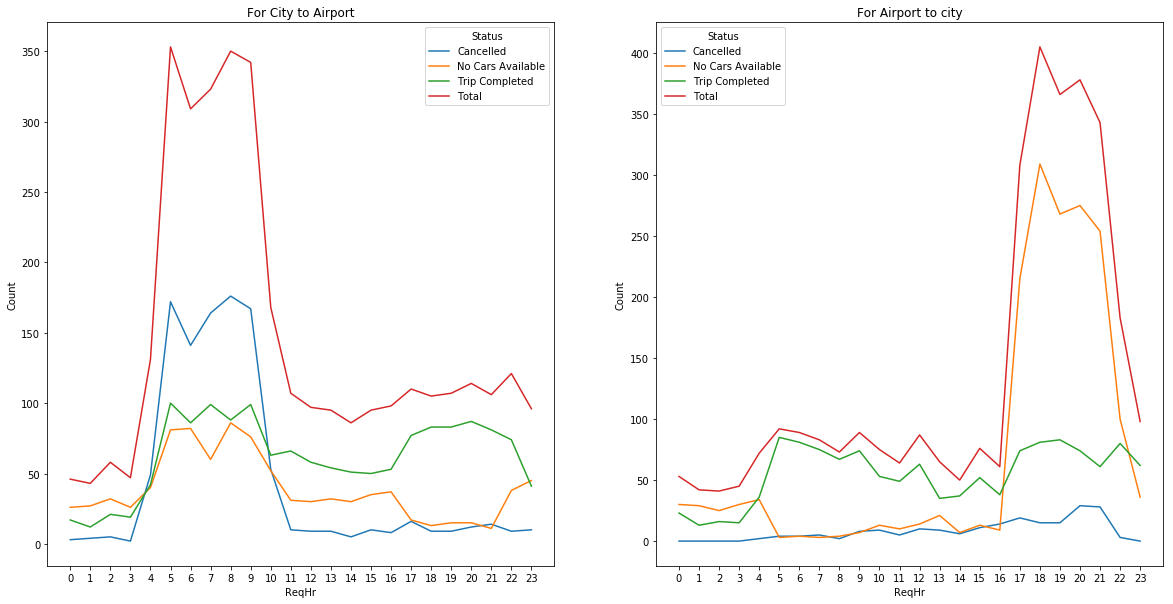

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.sca(ax1)
plt.title("For City to Airport")
plt.ylabel("Count")

#Create a dataframe containing the hr wise count of all the three Status. unstack() creates the column names
#as 'Cancelled', 'No cars available','Trips completed'
df_city1=df_city.groupby(['ReqHr','Status']).count()['Request id'].unstack()

#If any of the Status not present, the value is taken as Nan. So replace all the Nan values with 0 to calculate the
#total count correctly
df_city1=df_city1.fillna(0)

#Add another column 'Total' which stores the total Requests
df_city1['Total']=df_city1['Cancelled']+df_city1['No Cars Available']+df_city1['Trip Completed']
df_city1.plot(ax=ax1)
plt.xticks(np.arange(0, 24, step=1))

#similarly do the same as above for traffic from airport to city
plt.sca(ax2)
plt.title("For Airport to city")
plt.ylabel("Count")
df_airport1=df_airport.groupby(['ReqHr','Status']).count()['Request id'].unstack()
df_airport1=df_airport1.fillna(0)
df_airport1['Total']=df_airport1['Cancelled']+df_airport1['No Cars Available']+df_airport1['Trip Completed']
df_airport1.plot(ax=ax2)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

Do the same as above for plotting the counts of status on the basis of TimeSlots.

In [26]:
df_city.groupby(['Timeslot','Status']).count()
#df_city1.head()

Request id  Pickup point  Driver id  \
Timeslot      Status                                                   
Midnight      Cancelled                  63            63         63   
              No Cars Available         151           151          0   
              Trip Completed            111           111        111   
Early Morning Cancelled                 653           653        653   
              No Cars Available         309           309          0   
              Trip Completed            373           373        373   
Morning       Cancelled                 239           239        239   
              No Cars Available         189           189          0   
              Trip Completed            286           286        286   
Afternoon     Cancelled                  32            32         32   
              No Cars Available         134           134          0   
              Trip Completed            208           208        208   
Evening       Cancelled                  46            46         46   
              No Cars Available          60            60          0   
              Trip Completed            330           330        330   
Night         Cancelled                  33            33         33   
              No Cars Available          94            94          0   
              Trip Completed            196           196        196   

                                 Request timestamp  Drop timestamp  ReqHr  \
Timeslot      Status                                                        
Midnight      Cancelled                         63               0     63   
              No Cars Available                151               0    151   
              Trip Completed                   111             111    111   
Early Morning Cancelled                        653               0    653   
              No Cars Available                309               0    309   
              Trip Completed                   373             373    373   
Morning       Cancelled                        239               0    239   
              No Cars Available                189               0    189   
              Trip Completed                   286             286    286   
Afternoon     Cancelled                         32               0     32   
              No Cars Available                134               0    134   
              Trip Completed                   208             208    208   
Evening       Cancelled                         46               0     46   
              No Cars Available                 60               0     60   
              Trip Completed                   330             330    330   
Night         Cancelled                         33               0     33   
              No Cars Available                 94               0     94   
              Trip Completed                   196             196    196   

                                 TripTime  
Timeslot      Status                       
Midnight      Cancelled                 0  
              No Cars Available         0  
              Trip Completed          111  
Early Morning Cancelled                 0  
              No Cars Available         0  
              Trip Completed          373  
Morning       Cancelled                 0  
              No Cars Available         0  
              Trip Completed          286  
Afternoon     Cancelled                 0  
              No Cars Available         0  
              Trip Completed          208  
Evening       Cancelled                 0  
              No Cars Available         0  
              Trip Completed          330  
Night         Cancelled                 0  
              No Cars Available         0  
              Trip Completed          196

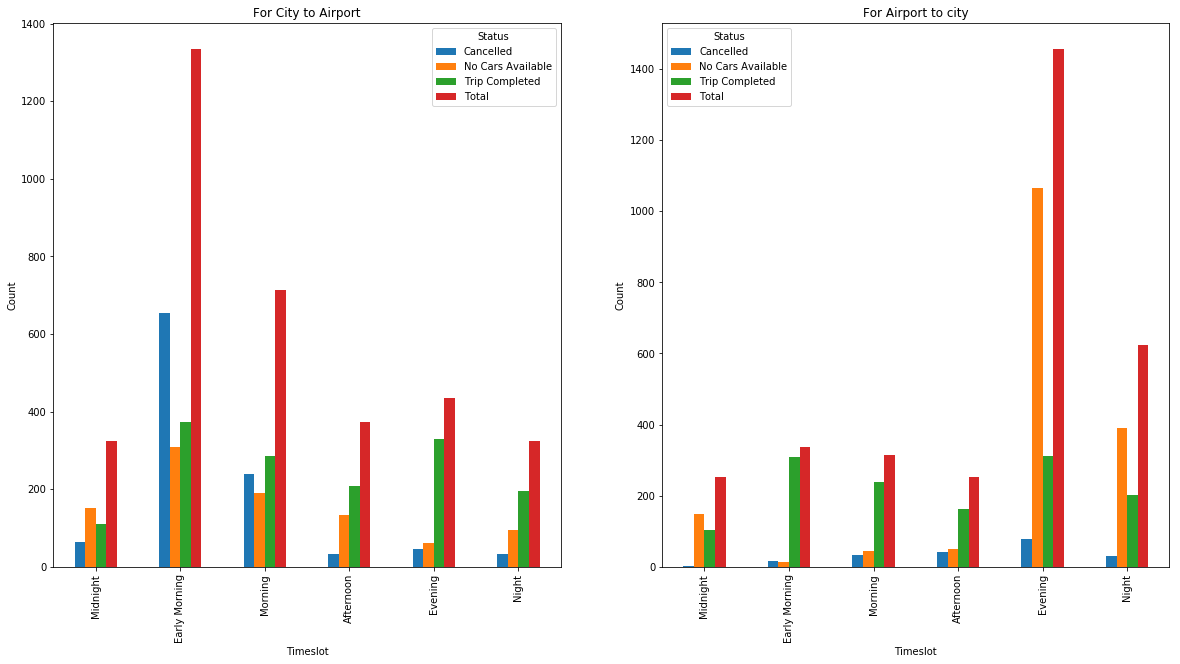

In [23]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.sca(ax1)
plt.title("For City to Airport")
plt.ylabel("Count")
df_city1=df_city.groupby(['Timeslot','Status']).count()['Request id'].unstack()
df_city1=df_city1.fillna(0)
df_city1['Total']=df_city1['Cancelled']+df_city1['No Cars Available']+df_city1['Trip Completed']
df_city1.plot(ax=ax1, kind='bar')
plt.sca(ax2)
plt.title("For Airport to city")
plt.ylabel("Count")
df_airport1=df_airport.groupby(['Timeslot','Status']).count()['Request id'].unstack()
df_airport1=df_airport1.fillna(0)
df_airport1['Total']=df_airport1['Cancelled']+df_airport1['No Cars Available']+df_airport1['Trip Completed']
df_airport1.plot(ax=ax2, kind='bar')
plt.show()

In the plot from city to Airport, we can see that in the interval from 5am -9am, or Early Morning there are more cancellations.
Whereas in the plot from Airport to City, in the interval of 5pm -9pm or Evening there are more cases of 'No cars available' which means the inflow of cars to the airport (from 5pm-9pm) is low as compared to the demand.

Let us plot the percentage of completed trips to Request ratio

In [24]:
print(df_city1.head())

Status         Cancelled  No Cars Available  Trip Completed  Total
Timeslot                                                          
Midnight              63                151             111    325
Early Morning        653                309             373   1335
Morning              239                189             286    714
Afternoon             32                134             208    374
Evening               46                 60             330    436


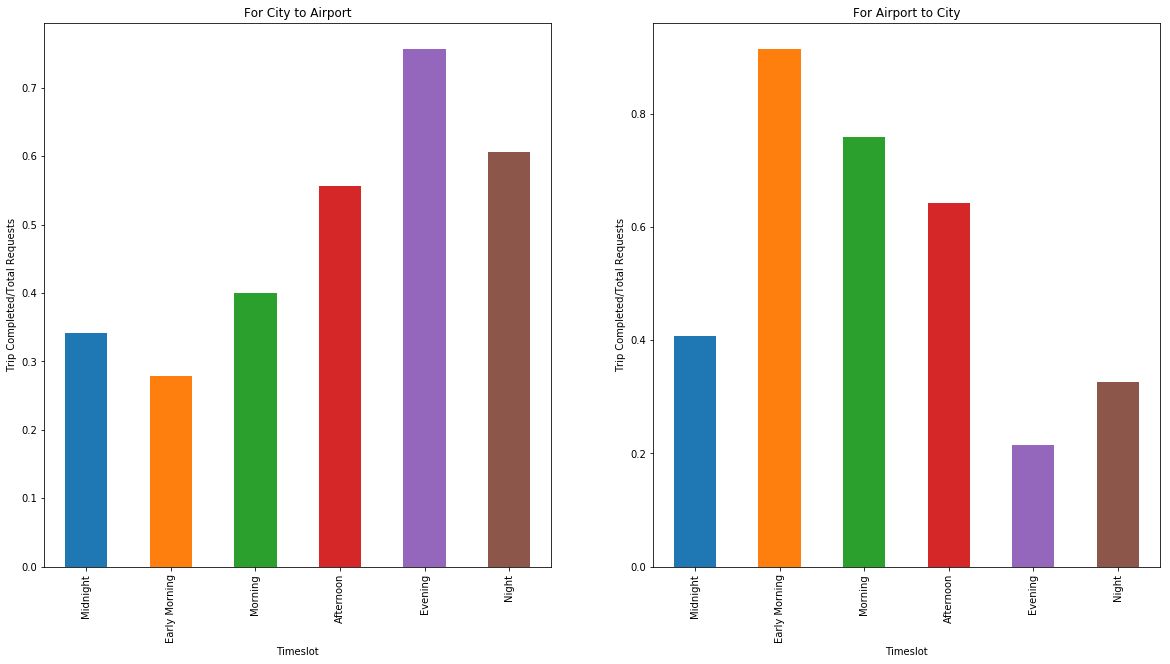

In [25]:
#Create another column 'ratio'
df_city1['ratio']=df_city1['Trip Completed']/df_city1['Total']
df_airport1['ratio']=df_airport1['Trip Completed']/df_airport1['Total']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.sca(ax1)
plt.title("For City to Airport")
plt.ylabel("Trip Completed/Total Requests")
df_city1['ratio'].plot(ax=ax1, kind='bar')
#plt.xticks(np.arange(0, 24, step=1))
plt.sca(ax2)
plt.title("For Airport to City")
plt.ylabel("Trip Completed/Total Requests")
df_airport1['ratio'].plot(ax=ax2, kind='bar')
#plt.xticks(np.arange(0, 24, step=1))
plt.show()

In the plot from city to Airport, we can see that Percentage of Completed Trips is the least for the time slot Early Morning
Whereas in the plot from Airport to City, the Percentage of Completed Trips is the least for the time interval Evening
Let us analyse if any particular Driver is causing a problem

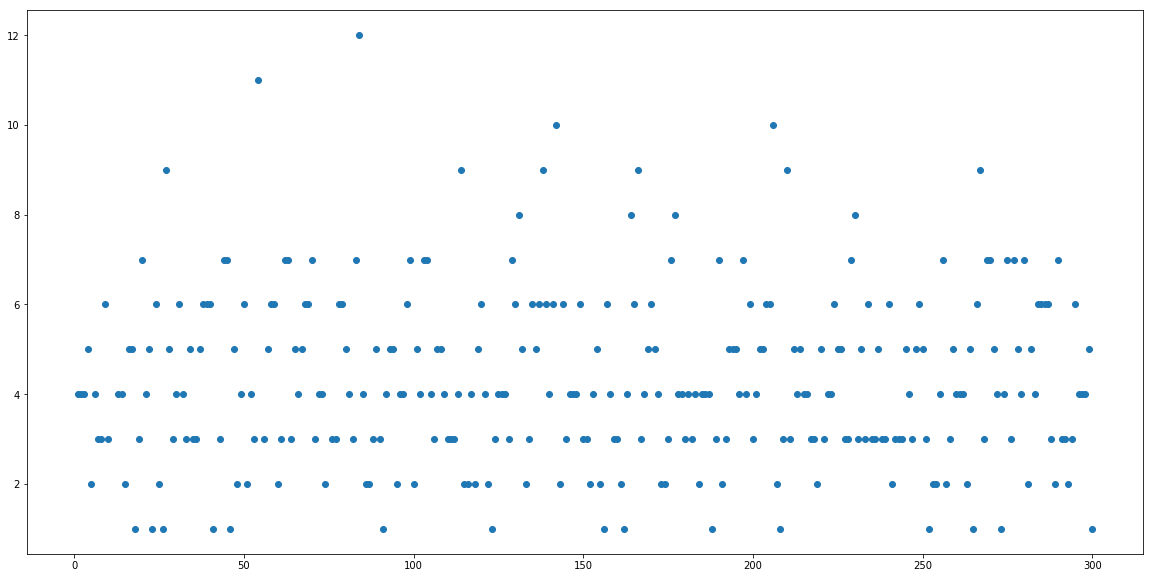

In [26]:
# Creating a scatter plot segmented on Driver Id
fig, ax = plt.subplots(figsize=(20,10))
df_cancel=df.loc[df.Status == 'Cancelled']
#changing the groupby object to a dataframe
df_c=df_cancel.groupby(['Driver id'])
df_c=pd.DataFrame(df_c.size().reset_index(name="Count"))
plt.scatter(df_c['Driver id'], df_c['Count'])
plt.show()

Lets filter the data to show only the drivers with cancellations more than 8

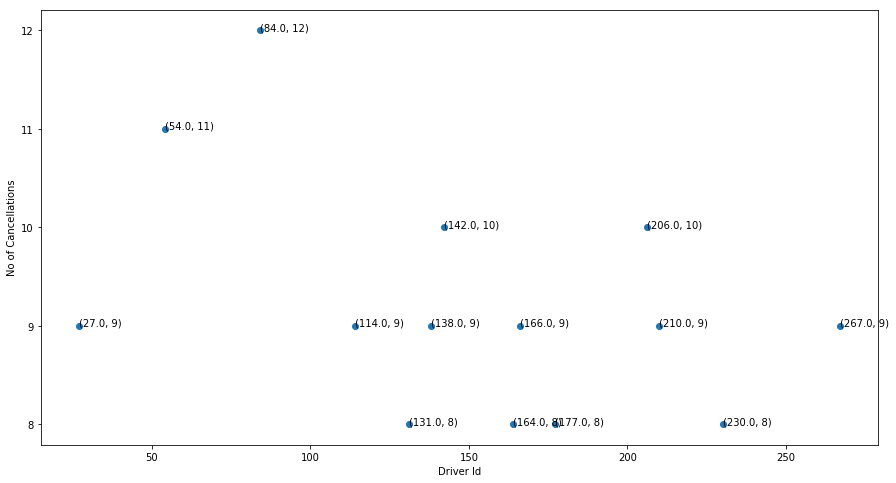

In [27]:
df_c1=df_c.loc[df_c.Count >=8]
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(df_c1['Driver id'], df_c1['Count'])
plt.xlabel('Driver Id')
plt.ylabel('No of Cancellations')
plt.yticks(np.arange(8, 13, step=1))
for xy in zip(df_c1['Driver id'], df_c1['Count']):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.show()

These are the drivers which are cancelling the requests. The Uber people can talk to these drivers for the reasons for cancellations.

In [28]:
print(df.loc[df['Driver id'] == 84].sort_values(by='Request timestamp'))

      Request id Pickup point  Driver id          Status   Request timestamp  \
819          422         City       84.0  Trip Completed 2016-07-11 08:42:00   
3168         536         City       84.0       Cancelled 2016-07-11 09:59:00   
820          578      Airport       84.0  Trip Completed 2016-07-11 11:03:00   
3169        1134      Airport       84.0       Cancelled 2016-07-11 20:33:00   
3170        1604         City       84.0       Cancelled 2016-07-12 06:37:00   
3171        1653         City       84.0       Cancelled 2016-07-12 07:27:00   
3172        1695         City       84.0       Cancelled 2016-07-12 07:57:00   
3173        2750         City       84.0       Cancelled 2016-07-13 03:24:24   
3174        2884         City       84.0       Cancelled 2016-07-13 05:54:44   
821         3035         City       84.0  Trip Completed 2016-07-13 07:31:14   
3175        3191         City       84.0       Cancelled 2016-07-13 09:32:18   
3176        3193         City       84.0

From the above data, we can see that the driver cancelled all the requests on the 12th.

In [29]:
print(df.loc[df['Driver id'] == 54].sort_values(by='Request timestamp'))

      Request id Pickup point  Driver id          Status   Request timestamp  \
3032         216         City       54.0       Cancelled 2016-07-11 06:13:00   
522          234         City       54.0  Trip Completed 2016-07-11 06:27:00   
523          425      Airport       54.0  Trip Completed 2016-07-11 08:48:00   
524         1528         City       54.0  Trip Completed 2016-07-12 05:58:00   
525         1671      Airport       54.0  Trip Completed 2016-07-12 07:41:00   
3033        1898         City       54.0       Cancelled 2016-07-12 10:27:00   
3034        2077         City       54.0       Cancelled 2016-07-12 15:40:00   
526         2223         City       54.0  Trip Completed 2016-07-12 18:07:00   
3035        2486      Airport       54.0       Cancelled 2016-07-12 20:50:00   
3036        2809         City       54.0       Cancelled 2016-07-13 05:05:12   
3037        2900         City       54.0       Cancelled 2016-07-13 06:01:55   
3038        3022         City       54.0

From the above plot and the details according to the driver id, we see that the drivers are generally cancelling the requests at odd hours and in the morning.

In [30]:
#Add another column 'Gap' to find the gap in demand and supply
df_city1['Gap']=df_city1['Total'] - df_city1['Trip Completed']
df_city1.head(10)

Status,Cancelled,No Cars Available,Trip Completed,Total,ratio,Gap
Timeslot,,,,,,
Midnight,63,151,111,325,0.341538,214
Early Morning,653,309,373,1335,0.279401,962
Morning,239,189,286,714,0.400560,428
Afternoon,32,134,208,374,0.556150,166
Evening,46,60,330,436,0.756881,106
Night,33,94,196,323,0.606811,127


In [31]:
df_airport1['Gap']=df_airport1['Total'] - df_airport1['Trip Completed']
df_airport1.head(10)

Status,Cancelled,No Cars Available,Trip Completed,Total,ratio,Gap
Timeslot,,,,,,
Midnight,2,148,103,253,0.407115,150
Early Morning,15,14,308,337,0.913947,29
Morning,32,44,239,315,0.758730,76
Afternoon,40,50,162,252,0.642857,90
Evening,78,1067,312,1457,0.214139,1145
Night,31,390,203,624,0.325321,421


Plot the bar chart for the Gap in Demand and Supply for each Status.

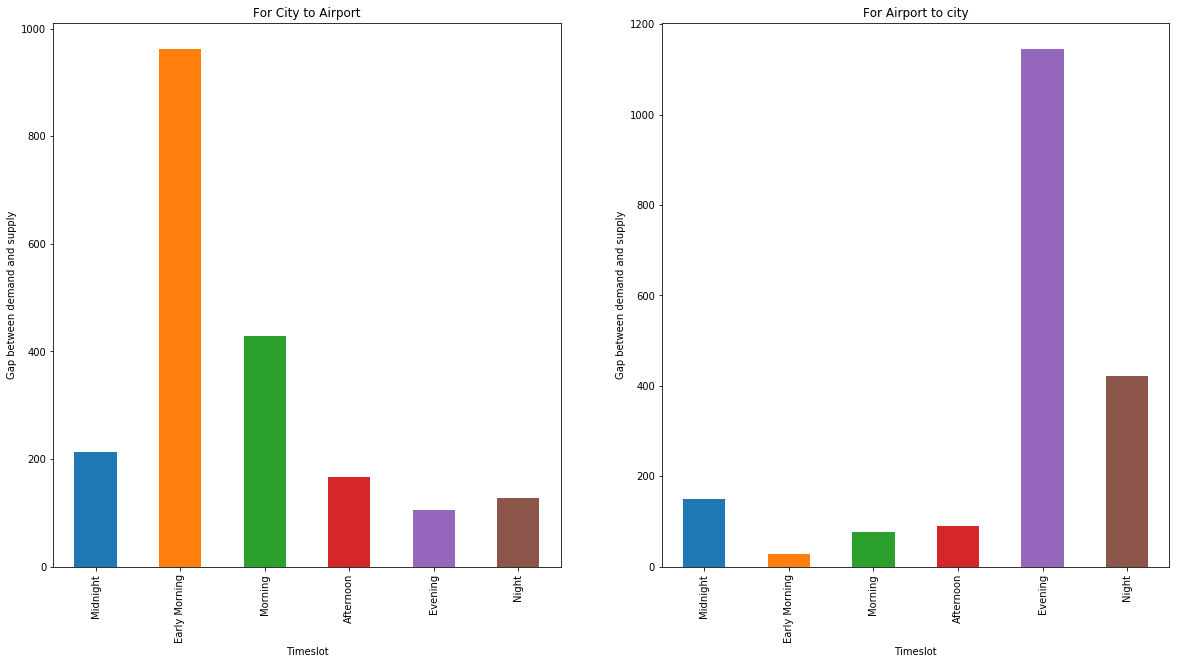

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.sca(ax1)
plt.title("For City to Airport")
plt.ylabel("Gap between demand and supply")
df_city1['Gap'].plot(ax=ax1,kind='bar')
#plt.xticks(np.arange(0, 24, step=1))
plt.sca(ax2)
plt.title("For Airport to city")
plt.ylabel("Gap between demand and supply")
df_airport1['Gap'].plot(ax=ax2,kind='bar')
#plt.xticks(np.arange(0, 24, step=1))
plt.show()

The highest gap is in Early Morning from city to Airport and in the Evening from Airport to City.
Export the dataframes for visualising in Tableau.

In [33]:
df_city1.to_csv("city.csv")
df_airport1.to_csv("airport.csv")